In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_folder = 'drive/MyDrive/Indian/'
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(train_folder))
    
    for folder in folders:
        index += 1
      
        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(train_folder + '/' + folder):
            img = cv2.imread(train_folder + '/' + folder + '/' + image, 0)
            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

    return x_train, x_test, y_train, y_test
    
def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res


In [ ]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  1  has started.
Loading images from folder  2  has started.
Loading images from folder  3  has started.
Loading images from folder  4  has started.
Loading images from folder  5  has started.
Loading images from folder  6  has started.
Loading images from folder  7  has started.
Loading images from folder  8  has started.
Loading images from folder  9  has started.
Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  h

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=13)
x_test, y_test = shuffle(x_test, y_test, random_state=13)

## When training on whole data then make sure you are changing Dense value layer from 9 to 35 as there are total 35 folders for ISL

In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

## If you are training on complete data then commend above map_characters line and use below map_characters where we had mapped all folders into letters and numbers

In [ ]:
#map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}

map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                 25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

## When you are training for whole data then remember to change classes=35 as their are total 35 folders. I had trained on 9 folders only that's why i had used 9 classes

In [ ]:
classes = 35
epochs = 10
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
647/647 [==============================] - 110s 166ms/step - loss: 0.1820 - accuracy: 0.9517 - val_loss: 4.1209e-04 - val_accuracy: 1.0000
Epoch 2/10
647/647 [==============================] - 106s 164ms/step - loss: 8.4195e-05 - accuracy: 1.0000 - val_loss: 9.3089e-06 - val_accuracy: 1.0000
Epoch 3/10
647/647 [==============================] - 108s 168ms/step - loss: 1.4561e-05 - accuracy: 1.0000 - val_loss: 5.8020e-06 - val_accuracy: 1.0000
Epoch 4/10
647/647 [==============================] - 103s 159ms/step - loss: 5.8766e-06 - accuracy: 1.0000 - val_loss: 2.8071e-06 - val_accuracy: 1.0000
Epoch 5/10
647/647 [==============================] - 106s 163ms/step - loss: 3.3665e-06 - accuracy: 1.0000 - val_loss: 1.5325e-06 - val_accuracy: 1.0000
Epoch 6/10
647/647 [==============================] - 102s 158ms/step - loss: 2.1666e-06 - accuracy: 1.0000 - val_loss: 1.0230e-06 - val_accuracy: 1.0000
Epoch 7/10
647/647 [==============================] - 102s 158ms/step - loss: 1.

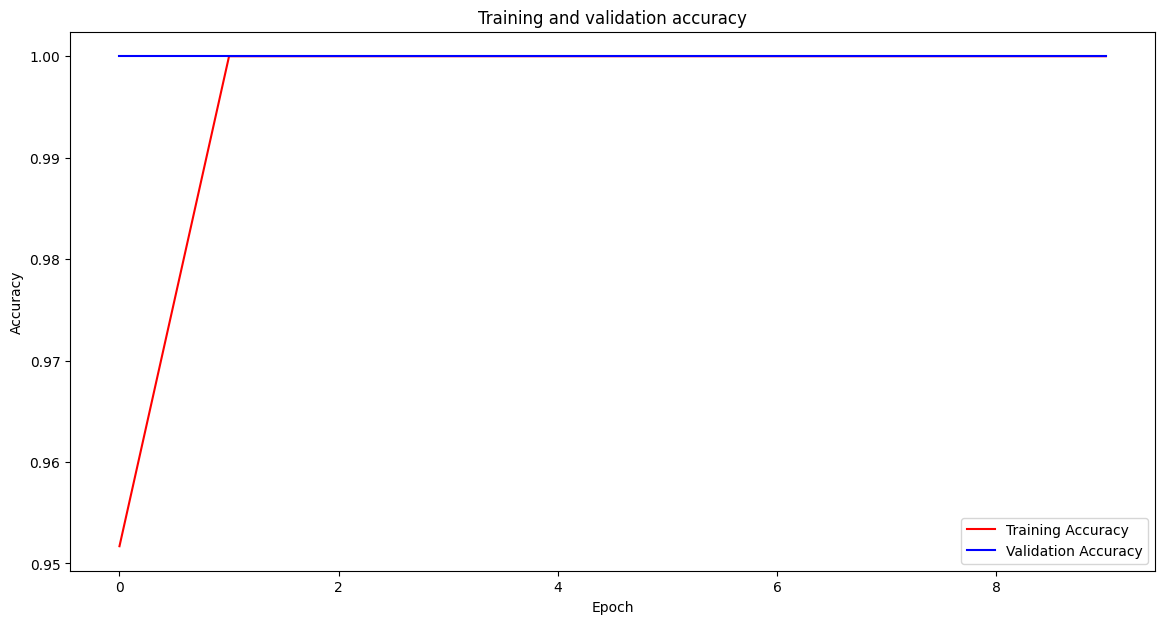

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

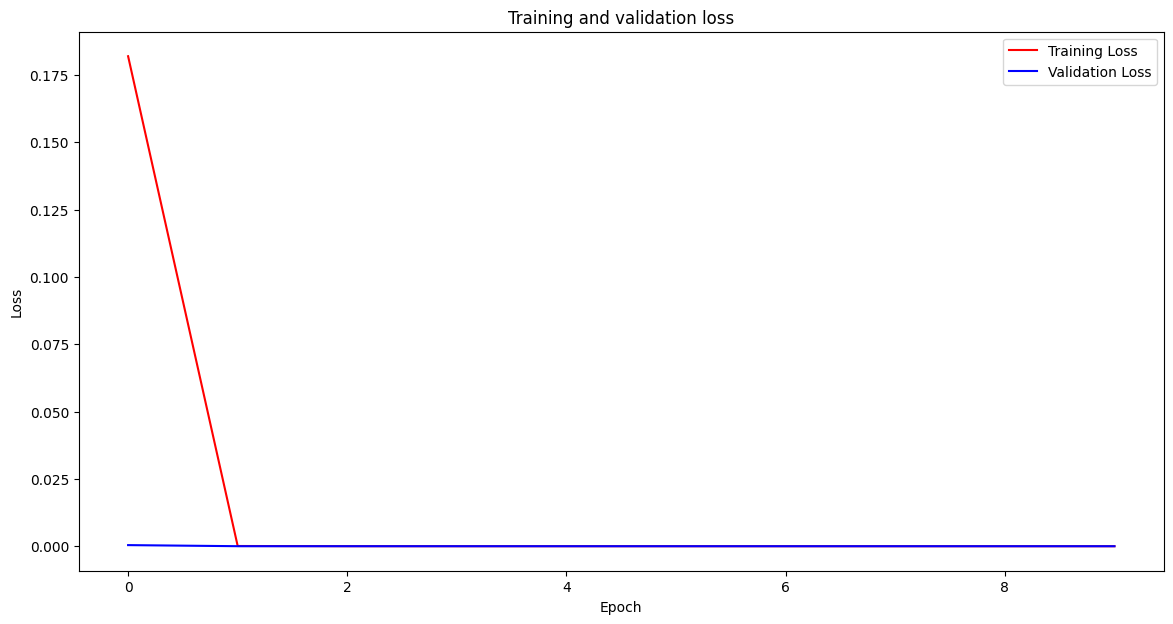

In [ ]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
model.save('signCNN_isl.h5')

In [ ]:
class_labels = list(map_characters.values())

In [ ]:
class_labels

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
print(Y_pred_classes)
print(Y_true)

72/72 [==============================] - 3s 38ms/step
[14 29 15 ...  9 14 27]
[14 29 15 ...  9 14 27]


## How to upload picture from x_test data and start doing testing

1/1 [==============================] - 0s 27ms/step
F


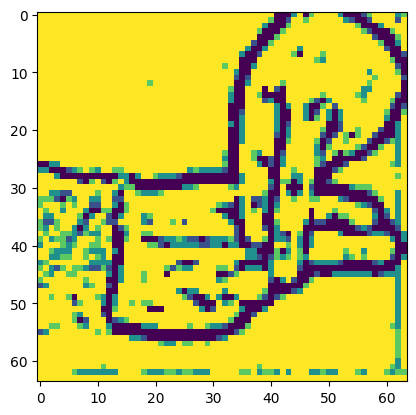

In [ ]:
# label mapping

#labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 7

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 64, 64, 1)

# pass in the network for prediction and
# save the predicted label
predicted_label = class_labels[model.predict(p).argmax()]
print(predicted_label)

# load the original label
#original_label = class_labels[y_test[image_number]]

# display the result
#print("Original label is {} and predicted label is {}".format(
#	original_label, predicted_label))


## How to upload any picture and do testing of ISL

In [ ]:
filename='content/drive/MyDrive/Indian'
img = cv2.imread(filename,0)
print(img.shape)
img = edge_detection(img)
img = cv2.resize(img, (64, 64))
print(img.shape)
img = img_to_array(img)
plt.imshow(img)

#width, height = img.size
# reshape it
p = img.reshape(1, 64, 64, 1)

# pass in the network for prediction and
# save the predicted label
predicted_label = class_labels[model.predict(p).argmax()]
print(predicted_label)

# load the original label
#original_label = class_labels[y_test[image_number]]

# display the result
#print("Original label is {} and predicted label is {}".format(
#	original_label, predicted_label))


AttributeError: ignored

TypeError: ignored

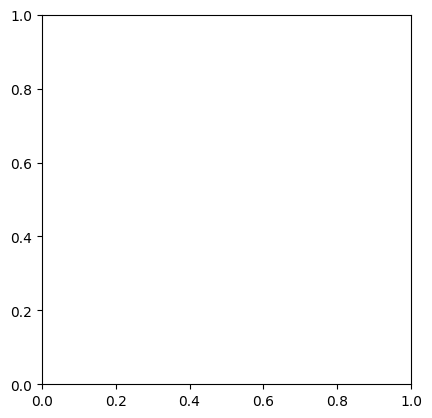

In [ ]:
import cv2 
img=cv2.imread('/content/IMG_9366.PNG',0)
plt.imshow(img)

In [ ]:
def predict_label (img_path):
  
  img = cv2.imread(img_path,0)
  
  img = edge_detection(img)
  img = cv2.resize(img, (64, 64))
  
  img = img_to_array(img)
  plt.imshow(img)

  #width, height = img.size
  # reshape it
  p = img.reshape(1, 64, 64, 1)

  # pass in the network for prediction and
  # save the predicted label
  predicted_label = class_labels[model.predict(p).argmax()]
  return predicted_label



In [ ]:
filename='/content/IMG_9366.PNG'
predict_label(filename)


error: ignored

In [ ]:
pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ngrok authtoken 2O6ToB6iriD9SxMOuKTpISlq9Sz_3FuiE8UB41hGBnn4eYLd8

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://c621-34-32-169-100.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [16/May/2023 19:29:22] "GET / HTTP/1.1" 200 -


static/7.jpg
1/1 [==============================] - 0s 23ms/step


INFO:werkzeug:127.0.0.1 - - [16/May/2023 19:29:37] "POST /submit HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/May/2023 19:29:37] "GET /static/7.jpg HTTP/1.1" 200 -


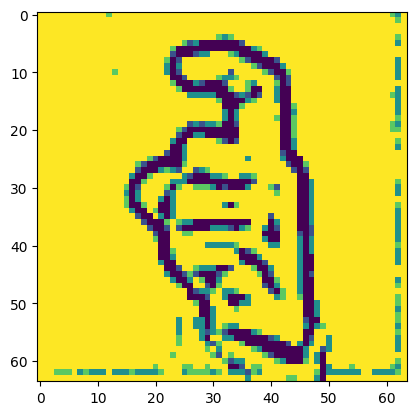

In [ ]:

import numpy as np
from flask_ngrok import run_with_ngrok
import cv2
from flask import Flask, render_template, request

app = Flask(__name__)
run_with_ngrok(app)   



@app.route("/", methods=['GET', 'POST'])
def main():
	return render_template("chandani.html")

@app.route("/submit", methods = ['GET', 'POST'])
def get_output():
  if request.method == 'POST':
    img = request.files['my_image']
    img_path = "static/" + img.filename	
    img.save(img_path)
    print(img_path)
    p = predict_label(img_path)
    #p="chandni"
    return render_template("chandani.html", prediction = p, img_path = img_path)
app.run()